<a href="https://colab.research.google.com/github/ichi-a00/google_colab/blob/main/ikawidget2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

スプラトゥーン２の戦績データから主成分分析を行います。
参照：https://ossyaritoori.hatenablog.com/entry/2020/04/30/%E2%91%A0_ikawidget2%E3%81%AE%E3%83%87%E3%83%BC%E3%82%BF%E3%82%92%E4%BD%BF%E3%81%A3%E3%81%A6Splatoon2%E3%81%A7%E3%81%AE%E7%B7%A8%E6%88%90%E3%82%92%E8%A9%95%E4%BE%A1_%EF%BD%9E%EF%BC%91%EF%BC%8E

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
csv = pd.read_csv("/content/ikaWidgetCSV_20211227140557_.csv")
#result = pd.read_csv("/content/Result.csv", header=0)

In [22]:
len(csv.keys()), len(csv["no"])

(640, 151)

In [4]:
result.head()

,no,version,stage,game,player,startTime,elapsedTime,win,udemae,udemaeName,udemaeIsX,udemaeIsReached,sPlusNumber,xRanking,xPower,myCount,otherCount,winMeter,rank,starRank,weaponPaintPoint,myMembers,otherMembers,leaguePoint,leagueMaxPoint,leagueTeamEstimatePoint,leagueOtherEstimatePoint,gachiEstimatePower,gachiEstimateXPower,fesPoint,fesPower,fesMaxPower,fesTeamEstimatePower,fesOtherEstimatePower,fesGrade,fesGradeName,fes,skillLogs
0,5603,0,<Stage>{0},<Game>{0},<Player>{0},2021-12-08 09:42:23 +0000,300,False,7,A,False,False,0,0,0,40.0,47.0,0.0,7,1,1543490,<Player>{1 2 3},<Player>{4 5 6 7},0,0,0,0,1480,0,0,0,0,0,0,0,<null>,<null>,<SkillLog>{0 1 2 3 4 5 6 7}
1,5602,0,<Stage>{1},<Game>{0},<Player>{8},2021-12-08 09:35:51 +0000,320,False,7,A,False,False,0,0,0,58.0,61.0,0.0,7,1,1542349,<Player>{9 10 11},<Player>{12 13 14 15},0,0,0,0,1500,0,0,0,0,0,0,0,<null>,<null>,<SkillLog>{8 9 10 11 12 13 14 15}
2,5601,0,<Stage>{1},<Game>{0},<Player>{16},2021-12-08 09:29:40 +0000,300,True,7,A,False,False,0,0,0,91.0,30.0,0.0,7,1,1541093,<Player>{17 18 19},<Player>{20 21 22 23},0,0,0,0,1480,0,0,0,0,0,0,0,<null>,<null>,<SkillLog>{16 17 18 19 20 21 22 23}
3,5600,0,<Stage>{1},<Game>{0},<Player>{24},2021-12-08 09:23:54 +0000,277,True,7,A,False,False,0,0,0,100.0,0.0,0.0,7,1,1540145,<Player>{25 26 27},<Player>{28 29 30 31},0,0,0,0,1500,0,0,0,0,0,0,0,<null>,<null>,<SkillLog>{24 25 26 27 28 29 30 31}
4,5599,0,<Stage>{1},<Game>{0},<Player>{32},2021-12-08 09:17:14 +0000,312,False,7,A,False,False,0,0,0,0.0,46.0,0.0,7,1,477848,<Player>{33 34 35},<Player>{36 37 38 39},0,0,0,0,1540,0,0,0,0,0,0,0,<null>,<null>,<SkillLog>{32 33 34 35 36 37 38 39}


In [10]:
result.keys()

Index(['no', 'version', 'stage', 'game', 'player', 'startTime', 'elapsedTime',
       'win', 'udemae', 'udemaeName', 'udemaeIsX', 'udemaeIsReached',
       'sPlusNumber', 'xRanking', 'xPower', 'myCount', 'otherCount',
       'winMeter', 'rank', 'starRank', 'weaponPaintPoint', 'myMembers',
       'otherMembers', 'leaguePoint', 'leagueMaxPoint',
       'leagueTeamEstimatePoint', 'leagueOtherEstimatePoint',
       'gachiEstimatePower', 'gachiEstimateXPower', 'fesPoint', 'fesPower',
       'fesMaxPower', 'fesTeamEstimatePower', 'fesOtherEstimatePower',
       'fesGrade', 'fesGradeName', 'fes', 'skillLogs'],
      dtype='object')

no                            int64
startTime                    object
elapsedTime                   int64
win                           int64
udemae                        int64
                             ...   
bravo4ShoesSub3SkillID       object
bravo4ShoesSub3SkillName     object
Unnamed: 637                float64
Unnamed: 638                float64
Unnamed: 639                float64
Length: 640, dtype: object

In [12]:
csv.isnull().sum()

no                            0
startTime                     0
elapsedTime                   0
win                           0
udemae                        0
                           ... 
bravo4ShoesSub3SkillID        1
bravo4ShoesSub3SkillName      1
Unnamed: 637                151
Unnamed: 638                151
Unnamed: 639                151
Length: 640, dtype: int64

In [37]:
data13 = csv.select_dtypes(["int64", "float64"])
data13.head(5)

,no,elapsedTime,win,udemae,udemaeIsX,udemaeIsReached,sPlusNumber,xRanking,xPower,myCount,otherCount,winMeter,weaponPaintPoint,leaguePoint,leagueMaxPoint,leagueTeamEstimatePoint,leagueOtherEstimatePoint,gachiEstimatePower,gachiEstimateXPower,fesPoint,fesPower,fesMaxPower,fesTeamEstimatePower,fesOtherEstimatePower,stageID,fesID,fesMyColorR,fesMyColorG,fesMyColorB,fesOtherColorR,fesOtherColorG,fesOtherColorB,playerRank,playerUdemae,playerSPlusNumber,playerUdemaeIsX,playerUdemaeIsReached,playerIsCrown,playerStarRank,playerKill,...,bravo4SPlusNumber,bravo4UdemaeIsX,bravo4UdemaeIsReached,bravo4IsCrown,bravo4StarRank,bravo4Kill,bravo4Death,bravo4Assist,bravo4Special,bravo4Ratio,bravo4AllKill,bravo4SortScore,bravo4PaintPoint,bravo4FesGrade,bravo4WeaponID,bravo4WeaponSpecialID,bravo4WeaponSubID,bravo4HeadID,bravo4HeadRarity,bravo4HeadBrandID,bravo4HeadBrandFrequentSkillID,bravo4HeadSkillID,bravo4HeadSub1SkillID,bravo4HeadSub2SkillID,bravo4ClothesID,bravo4ClothesRarity,bravo4ClothesBrandID,bravo4ClothesBrandFrequentSkillID,bravo4ClothesSkillID,bravo4ClothesSub1SkillID,bravo4ShoesID,bravo4ShoesRarity,bravo4ShoesBrandID,bravo4ShoesBrandFrequentSkillID,bravo4ShoesSkillID,bravo4ShoesSub1SkillID,bravo4ShoesSub2SkillID,Unnamed: 637,Unnamed: 638,Unnamed: 639
0,6295,300,0,7,0,0,0,0,0,47,76,0,21912,0,0,0,0,1530,0,0,0,0,0,0,5,0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,7.0,0.0,0.0,0.0,0.0,1.0,6.0,...,0.0,0.0,0.0,0.0,0.0,9.0,8.0,1.0,2.0,1125.0,10.0,3.0,1214.0,0.0,21.0,3.0,2.0,2010.0,0.0,9.0,200.0,201.0,200.0,200.0,10009.0,1.0,4.0,6.0,4.0,4.0,2031.0,0.0,10.0,2.0,1.0,1.0,0.0,NaN,NaN,NaN
1,6294,300,1,7,0,0,0,0,0,69,51,0,20667,0,0,0,0,1510,0,0,0,0,0,0,5,0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,7.0,0.0,0.0,0.0,0.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,6.0,12.0,4.0,4.0,500.0,10.0,1.0,1231.0,0.0,61.0,0.0,4.0,5001.0,1.0,5.0,7.0,1.0,1.0,1.0,2008.0,0.0,0.0,11.0,2.0,2.0,8007.0,1.0,3.0,3.0,0.0,0.0,0.0,NaN,NaN,NaN
2,6293,300,0,7,0,0,0,0,0,37,79,0,775,0,0,0,0,1620,0,0,0,0,0,0,16,0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,7.0,0.0,0.0,0.0,0.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,6.0,6.0,2.0,1.0,1000.0,8.0,2.0,802.0,0.0,4012.0,17.0,8.0,3008.0,2.0,3.0,3.0,101.0,200.0,200.0,7009.0,2.0,17.0,201.0,4.0,201.0,1014.0,0.0,8.0,0.0,201.0,3.0,0.0,NaN,NaN,NaN
3,6292,300,1,7,0,0,0,0,0,73,12,0,3723,0,0,0,0,1550,0,0,0,0,0,0,16,0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,7.0,0.0,0.0,0.0,0.0,1.0,6.0,...,0.0,0.0,0.0,0.0,1.0,5.0,12.0,4.0,1.0,416.0,9.0,3.0,768.0,0.0,72.0,17.0,0.0,5000.0,1.0,5.0,7.0,201.0,201.0,7.0,1035.0,1.0,0.0,11.0,0.0,0.0,2009.0,1.0,8.0,0.0,2.0,2.0,2.0,NaN,NaN,NaN
4,6291,300,0,7,0,0,0,0,0,53,74,0,1780816,0,0,0,0,1530,0,0,0,0,0,0,16,0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,7.0,0.0,0.0,0.0,0.0,1.0,9.0,...,0.0,0.0,0.0,0.0,0.0,9.0,4.0,3.0,4.0,2250.0,12.0,3.0,900.0,0.0,2001.0,11.0,4.0,1006.0,0.0,6.0,1.0,4.0,4.0,4.0,5001.0,2.0,11.0,5.0,4.0,4.0,7000.0,0.0,2.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN


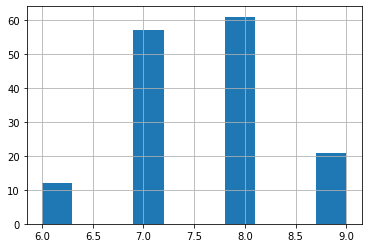

In [15]:
data13["udemae"].hist()

In [16]:
data13.groupby(['stageID']).mean()['win'].round(3)

stageID
0     0.625
1     0.533
2     0.636
3     0.450
5     0.250
6     0.500
7     0.667
8     0.333
13    0.600
14    0.750
15    0.667
16    0.625
17    0.500
21    0.636
22    0.286
Name: win, dtype: float64

In [20]:
csv.groupby(["stageName"]).mean()["win"].round(3)

stageName
 アロワナモール        0.667
 アンチョビットゲームズ    0.636
 ガンガゼ野外音楽堂      0.636
 コンブトラック        0.250
 ザトウマーケット       0.600
 ショッツル鉱山        0.500
 タチウオパーキング      0.333
 チョウザメ造船        0.450
 ハコフグ倉庫         0.750
 バッテラストリート      0.625
 フジツボスポーツクラブ    0.533
 ホッケふ頭          0.667
 マンタマリア号        0.500
 ムツゴ楼           0.286
 モンガラキャンプ場      0.625
Name: win, dtype: float64

In [21]:
csv.corr()

,no,elapsedTime,win,udemae,udemaeIsX,udemaeIsReached,sPlusNumber,xRanking,xPower,myCount,otherCount,winMeter,weaponPaintPoint,leaguePoint,leagueMaxPoint,leagueTeamEstimatePoint,leagueOtherEstimatePoint,gachiEstimatePower,gachiEstimateXPower,fesPoint,fesPower,fesMaxPower,fesTeamEstimatePower,fesOtherEstimatePower,stageID,fesID,fesMyColorR,fesMyColorG,fesMyColorB,fesOtherColorR,fesOtherColorG,fesOtherColorB,playerRank,playerUdemae,playerSPlusNumber,playerUdemaeIsX,playerUdemaeIsReached,playerIsCrown,playerStarRank,playerKill,...,bravo4SPlusNumber,bravo4UdemaeIsX,bravo4UdemaeIsReached,bravo4IsCrown,bravo4StarRank,bravo4Kill,bravo4Death,bravo4Assist,bravo4Special,bravo4Ratio,bravo4AllKill,bravo4SortScore,bravo4PaintPoint,bravo4FesGrade,bravo4WeaponID,bravo4WeaponSpecialID,bravo4WeaponSubID,bravo4HeadID,bravo4HeadRarity,bravo4HeadBrandID,bravo4HeadBrandFrequentSkillID,bravo4HeadSkillID,bravo4HeadSub1SkillID,bravo4HeadSub2SkillID,bravo4ClothesID,bravo4ClothesRarity,bravo4ClothesBrandID,bravo4ClothesBrandFrequentSkillID,bravo4ClothesSkillID,bravo4ClothesSub1SkillID,bravo4ShoesID,bravo4ShoesRarity,bravo4ShoesBrandID,bravo4ShoesBrandFrequentSkillID,bravo4ShoesSkillID,bravo4ShoesSub1SkillID,bravo4ShoesSub2SkillID,Unnamed: 637,Unnamed: 638,Unnamed: 639
no,1.000000,0.207944,-0.036640,0.006663,NaN,NaN,NaN,NaN,NaN,-0.162699,0.070426,NaN,-0.026170,NaN,NaN,NaN,NaN,0.317501,NaN,NaN,NaN,NaN,NaN,NaN,-0.168954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.951102,-0.006520,NaN,NaN,NaN,NaN,NaN,0.200831,...,NaN,NaN,NaN,NaN,0.021957,0.190778,0.214567,0.157072,-0.115104,0.008560,0.230705,0.120659,-0.013707,NaN,0.148240,0.049350,-0.015560,-0.060134,-0.053988,-0.078702,0.076549,-0.045248,0.074904,0.037834,-0.043982,-0.010201,-0.120584,-0.058147,0.055734,-0.002827,-0.211723,-0.177749,-0.041504,-0.046631,-0.013652,-0.065173,-0.044397,NaN,NaN,NaN
elapsedTime,0.207944,1.000000,-0.006905,-0.173548,NaN,NaN,NaN,NaN,NaN,0.086625,0.159642,NaN,0.038858,NaN,NaN,NaN,NaN,-0.053483,NaN,NaN,NaN,NaN,NaN,NaN,-0.097109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.157949,-0.112904,NaN,NaN,NaN,NaN,NaN,0.573947,...,NaN,NaN,NaN,NaN,-0.013227,0.420619,0.623860,0.260469,0.437992,-0.083117,0.474461,0.083862,0.718929,NaN,0.087228,-0.046783,-0.007256,0.015807,0.009885,0.091470,0.100796,0.024933,0.036265,-0.023487,-0.008518,-0.074568,0.003752,-0.011149,0.020538,-0.045217,0.027191,-0.019268,0.048739,-0.000838,0.042115,0.025865,0.131938,NaN,NaN,NaN
win,-0.036640,-0.006905,1.000000,-0.016504,NaN,NaN,NaN,NaN,NaN,0.777440,-0.772658,NaN,0.169707,NaN,NaN,NaN,NaN,-0.088940,NaN,NaN,NaN,NaN,NaN,NaN,0.015047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003482,-0.084447,NaN,NaN,NaN,NaN,NaN,0.094445,...,NaN,NaN,NaN,NaN,-0.001894,-0.231290,0.354191,-0.132248,-0.110962,-0.435433,-0.256525,-0.122900,-0.099654,NaN,-0.087735,0.019132,-0.074859,0.072128,-0.050107,-0.046767,0.100286,0.011905,0.005032,0.131976,-0.062546,-0.003526,-0.026375,-0.126954,0.044344,-0.031494,-0.001609,0.052451,-0.109306,-0.024464,0.034614,0.037851,0.016790,NaN,NaN,NaN
udemae,0.006663,-0.173548,-0.016504,1.000000,NaN,NaN,NaN,NaN,NaN,0.006310,-0.064904,NaN,0.111134,NaN,NaN,NaN,NaN,0.455247,NaN,NaN,NaN,NaN,NaN,NaN,0.162493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017030,0.955477,NaN,NaN,NaN,NaN,NaN,-0.152547,...,NaN,NaN,NaN,NaN,-0.126465,-0.103160,-0.142763,-0.213848,-0.056542,-0.082255,-0.176093,0.127679,-0.082197,NaN,-0.005845,0.069886,0.122009,0.027029,0.049746,0.152573,-0.084008,-0.187385,-0.127433,-0.086976,-0.014599,0.069327,0.010812,0.139566,-0.077175,0.046090,0.107281,-0.032973,0.097586,0.056609,-0.054841,-0.085307,-0.070746,NaN,NaN,NaN
udemaeIsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [24]:
import sklearn.tree as tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [25]:
clf = tree.DecisionTreeClassifier(max_depth=10)

In [50]:
data13 = csv.select_dtypes(["int64", "float64"])
data13.isnull().sum()
data13 = data13.drop(["Unnamed: 637"], axis=1)
data13 = data13.drop(["Unnamed: 638"], axis=1)
data13 = data13.drop(["Unnamed: 639"], axis=1)

In [54]:
data13 = data13.dropna()

In [55]:
# 訓練と結果に分ける
X_train = data13.drop(["win"],axis=1)
y_train = data13["win"]


y_train

0      0
1      1
2      0
3      1
4      0
      ..
145    0
146    1
147    1
148    1
149    1
Name: win, Length: 150, dtype: int64

In [56]:
# 5分割交差検証を指定し、インスタンス化
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# スコアとモデルを格納するリスト
score_list = []
models = []

# 各分割ごとに評価
for fold_, (train_index, valid_index) in enumerate(kf.split(X_train, y_train)):    
    print(f'fold{fold_ + 1} start')
    train_x = X_train.iloc[train_index]
    valid_x = X_train.iloc[valid_index]
    train_y = y_train.iloc[train_index]
    valid_y = y_train.iloc[valid_index]
    
    ## 分割データで学習・予測・評価
    clf = tree.DecisionTreeClassifier(max_depth=10)
    model = clf.fit(train_x, train_y)
    
    # データを用いて予測，記録
    predicted = model.predict(valid_x)
    score_list.append(accuracy_score(predicted,valid_y))
    models.append(model)
print(score_list, '平均score', round(np.mean(score_list), 3))

fold1 start
fold2 start
fold3 start
fold4 start
fold5 start
[0.9333333333333333, 0.9666666666666667, 0.8333333333333334, 0.8666666666666667, 0.7666666666666667] 平均score 0.873


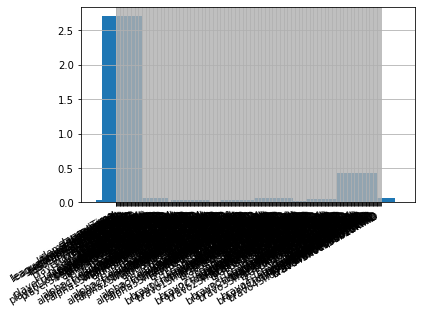

In [58]:
import matplotlib.pyplot as plt

importances = np.zeros(model.feature_importances_.size)

for model in models:
    importances += model.feature_importances_

fig, ax = plt.subplots()
plt.grid()
ax.bar(train_x.columns,importances)
fig.autofmt_xdate() # make space for and rotate the x-axis tick labels
plt.show()

In [77]:
model.feature_importances_.nonzero()

(array([  0,   8,   9, 246, 267]),)

In [84]:
train_x.columns[0],train_x.columns[8],train_x.columns[9],train_x.columns[246],train_x.columns[267]


('no', 'myCount', 'otherCount', 'bravo2ClothesID', 'bravo3Kill')

In [22]:
csv['gameMode']

0       ガチマッチ
1       ガチマッチ
2       ガチマッチ
3       ガチマッチ
4       ガチマッチ
        ...  
427     ガチマッチ
428     ガチマッチ
429     ガチマッチ
430     ガチマッチ
431     ガチマッチ
Name: gameMode, Length: 432, dtype: object

In [54]:
csv['playerAllKill']

0       8
1      12
2       5
3       6
4      12
       ..
427     7
428     1
429     8
430     6
431    11
Name: playerAllKill, Length: 432, dtype: int64

In [3]:
#ｃｓｖ['playerWeaponName']

In [33]:
dfarray = []

# For ループを回してデータをArray状にする
for item in csv.iterrows():
    # 1. game information
    game = item[1]["gameRule"].strip()
    # 2. gachi power if X or not
    #gachipower = item["gachiEstimateXPower"] if item["udemaeIsX"] else item["gachiEstimatePower"] 
    # 3. extract elapsed time
    battletime = item[1]["elapsedTime"]
    # 4. stage
    stage = item[1]["stageName"].strip()
    # 5, Mypower
    gachipower = item[1]["gachiEstimatePower"]
    # 6. My data
    mykill = item[1]["playerAllKill"]
    mydeath = item[1]["playerDeath"]    
    mysp = item[1]["playerSpecial"]
    myweapon = item[1]["playerWeaponName"]
    mypaintpt = item[1]["playerPaintPoint"]
    # 7. Our data
    ourkill = mykill+item[1]["alpha1AllKill"]+item[1]["alpha2AllKill"]+item[1]["alpha3AllKill"]
    ourdeath = mydeath+item[1]["alpha1Death"]+item[1]["alpha2Death"]+item[1]["alpha3Death"]
    oursp = mysp+item[1]["alpha1Special"]+item[1]["alpha2Special"]+item[1]["alpha3Special"]
    ourweapon = [myweapon]
    ourweapon.append(item[1]["alpha1WeaponName"])
    ourweapon.append(item[1]["alpha2WeaponName"])
    ourweapon.append(item[1]["alpha3WeaponName"])
    ourpaintpt = mypaintpt+item[1]["alpha1PaintPoint"]+item[1]["alpha2PaintPoint"]+item[1]["alpha3PaintPoint"]
    # 8. Enemy data
    theirkill = 0
    theirdeath = 0
    theirsp = 0
    theirweapon = []
    theirpaintpt = 0
    theirkill =  item[1]["bravo1AllKill"]+item[1]["bravo2AllKill"]+item[1]["bravo3AllKill"]+item[1]["bravo4AllKill"]
    theirdeath = item[1]["bravo1Death"]+item[1]["bravo2Death"]+item[1]["bravo3Death"]+item[1]["bravo4Death"]
    theirsp = item[1]["bravo1Special"]+item[1]["bravo2Special"]+item[1]["bravo3Special"]+item[1]["bravo4Special"]
    theirweapon.append(item[1]["bravo1WeaponName"])
    theirweapon.append(item[1]["bravo2WeaponName"])
    theirweapon.append(item[1]["bravo3WeaponName"])
    theirweapon.append(item[1]["bravo4WeaponName"])
    theirpaintpt = item[1]["bravo1PaintPoint"]+item[1]["bravo2PaintPoint"]+item[1]["bravo3PaintPoint"]+item[1]["bravo4PaintPoint"]
    # 9. Results
    win = 1 if item[1]["win"] else 0
    
    dfarray.append([game,gachipower,battletime,stage,mykill,mydeath,mysp,mypaintpt,ourkill,ourdeath,oursp,ourpaintpt,theirkill,theirdeath,theirsp,theirpaintpt,win])

column_name = ["game","gachipower","battletime","stage","mykill","mydeath","mysp","mypaintpt","ourkill","ourdeath","oursp","ourpaintpt","theirkill","theirdeath","theirsp","theirpaintpt","win"]

# テスト用のデータ格納
testdata=pd.DataFrame(data=dfarray,columns=column_name)


In [30]:
testdata.head()

,game,gachipower,battletime,stage,mykill,mydeath,mysp,mypaintpt,ourkill,ourdeath,oursp,ourpaintpt,theirkill,theirdeath,theirsp,theirpaintpt,win
0,ガチヤグラ,1530,300,コンブトラック,8,7,6,1245,34,30,15,4110,35,27,13,3494,0
1,ガチヤグラ,1510,300,コンブトラック,12,5,6,1067,66,22,18,4287,32,46,13,4073,1
2,ガチヤグラ,1620,300,モンガラキャンプ場,5,11,2,775,36,37,11,3310,48,28,5,3302,0
3,ガチヤグラ,1550,300,モンガラキャンプ場,6,7,4,864,48,22,17,3604,27,41,9,3537,1
4,ガチヤグラ,1530,300,モンガラキャンプ場,12,7,5,1120,34,31,17,4077,36,27,18,3913,0


testdata　分析用のデータ

In [34]:
testdata["game"][80]

'ガチエリア'

In [55]:
areadata = testdata[testdata["game"]=="ガチエリア"]
yaguradata = testdata[testdata["game"]=="ガチヤグラ"]
hokodata = testdata[testdata["game"]=="ガチホコバトル"]
asaridata = testdata[testdata["game"]=="ガチアサリ"]

In [44]:
areadata.shape, yaguradata.shape, hokodata.shape, asaridata.shape

((107, 17), (111, 17), (126, 17), (78, 17))

In [56]:
areadata = areadata.drop(["game","stage","battletime"],axis=1)
yaguradata = yaguradata.drop(["game","stage","battletime"],axis=1)
hokodata = hokodata.drop(["game","stage","battletime"],axis=1)
asaridata = asaridata.drop(["game","stage","battletime"],axis=1)

alldata = testdata.drop(["game","stage","battletime"],axis=1)



決定木 交差検証で勝敗予想

In [60]:
rules = [areadata, yaguradata, hokodata, asaridata, alldata]

In [38]:
import sklearn.tree as tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(max_depth=10)

In [58]:
for rule in rules:
  # 訓練と結果に分ける
  X_train = rule.drop(["win"],axis=1)
  y_train = rule["win"]


  # 5分割交差検証を指定し、インスタンス化
  from sklearn.model_selection import KFold
  kf = KFold(n_splits=5, shuffle=True, random_state=0)

  # スコアとモデルを格納するリスト
  score_list = []
  models = []

  # 各分割ごとに評価
  for fold_, (train_index, valid_index) in enumerate(kf.split(X_train, y_train)):    
      print(f'fold{fold_ + 1} start')
      train_x = X_train.iloc[train_index]
      valid_x = X_train.iloc[valid_index]
      train_y = y_train.iloc[train_index]
      valid_y = y_train.iloc[valid_index]
      
      ## 分割データで学習・予測・評価
      clf = tree.DecisionTreeClassifier(max_depth=10)
      model = clf.fit(train_x, train_y)
      
      # データを用いて予測，記録
      predicted = model.predict(valid_x)
      score_list.append(accuracy_score(predicted,valid_y))
      models.append(model)
  print(score_list, f'平均score', round(np.mean(score_list), 3))

fold1 start
fold2 start
fold3 start
fold4 start
fold5 start
[0.8181818181818182, 0.9090909090909091, 0.7619047619047619, 0.6666666666666666, 0.7619047619047619] 平均score 0.784
fold1 start
fold2 start
fold3 start
fold4 start
fold5 start
[0.6086956521739131, 0.7727272727272727, 0.5, 0.8636363636363636, 0.7272727272727273] 平均score 0.694
fold1 start
fold2 start
fold3 start
fold4 start
fold5 start
[0.23076923076923078, 0.72, 0.68, 0.36, 0.6] 平均score 0.518
fold1 start
fold2 start
fold3 start
fold4 start
fold5 start
[0.75, 0.625, 0.75, 0.6666666666666666, 0.4] 平均score 0.638
fold1 start
fold2 start
fold3 start
fold4 start
fold5 start
[0.7816091954022989, 0.7011494252873564, 0.7674418604651163, 0.686046511627907, 0.7325581395348837] 平均score 0.734


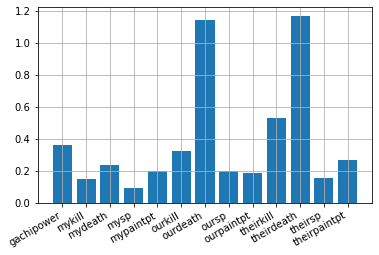

In [59]:
import matplotlib.pyplot as plt

importances = np.zeros(model.feature_importances_.size)

for model in models:
    importances += model.feature_importances_

fig, ax = plt.subplots()
plt.grid()
ax.bar(train_x.columns,importances)
fig.autofmt_xdate() # make space for and rotate the x-axis tick labels
plt.show()

In [70]:
# 訓練と結果に分ける
X_train = asaridata.drop(["win"],axis=1)
y_train = asaridata["win"]


# 5分割交差検証を指定し、インスタンス化
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# スコアとモデルを格納するリスト
score_list = []
models = []

# 各分割ごとに評価
for fold_, (train_index, valid_index) in enumerate(kf.split(X_train, y_train)):    
    train_x = X_train.iloc[train_index]
    valid_x = X_train.iloc[valid_index]
    train_y = y_train.iloc[train_index]
    valid_y = y_train.iloc[valid_index]
    
    ## 分割データで学習・予測・評価
    clf = tree.DecisionTreeClassifier(max_depth=10)
    model = clf.fit(train_x, train_y)
    
    # データを用いて予測，記録
    predicted = model.predict(valid_x)
    score_list.append(accuracy_score(predicted,valid_y))
    models.append(model)

asari_importances = np.zeros(model.feature_importances_.size)

for model in models:
   asari_importances += model.feature_importances_

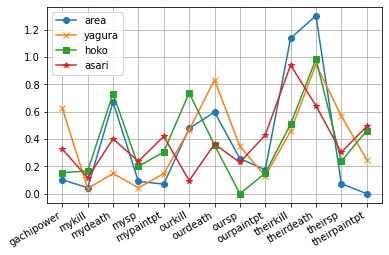

In [71]:
fig, ax = plt.subplots()
plt.grid()
xrange = range(len(area_importances))
ax.plot(xrange,area_importances,marker = 'o',label="area")
ax.plot(xrange,yagura_importances, marker='x',label="yagura")
ax.plot(xrange,hoko_importances,marker = 's',label="hoko")
ax.plot(xrange,asari_importances, marker='*',label="asari")
plt.legend()
plt.xticks(xrange,train_x.columns)
fig.autofmt_xdate() # make space for and rotate the x-axis tick labels
plt.show()

結論と考察：各ルールに共通して、自分のデス数・敵のキルデス数が多く勝敗に関係している。デスを減らすことが勝率を上げるために重要であるといえる。（当然）